In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import sys

sys.path.append("..")

In [18]:
# generating data
from server.optimisation.models import *
from server.optimisation.gen_data import *

def getTicksForDay(id):
    day = Day.model_validate({"day": id, "deferables": getDefDemands(id)})
    ticks = []
    for tick in range(TICKS_PER_DAY):
        sun = getSunlight(tick)
        demand = getInstDemand(id, tick)
        sell, buy = getPrice(id, tick)

        ticks.append(
            Tick.model_validate(
                {
                    "tick": tick,
                    "sun": sun,
                    "demand": demand,
                    "sell_price": sell,
                    "buy_price": buy,
                    "day": id,
                }
            )
        )
    return day, ticks

tick_data = []
for i in range(1700):
    _, tmp = getTicksForDay(143038273)
    tick_data += [[tick.buy_price] for tick in tmp]

In [19]:
len(tick_data)
tick_data

[[143038273.0, 11],
 [143038273.01666668, 36],
 [143038273.03333333, 29],
 [143038273.05, 26],
 [143038273.06666666, 22],
 [143038273.08333334, 13],
 [143038273.1, 15],
 [143038273.11666667, 8],
 [143038273.13333333, 11],
 [143038273.15, 31],
 [143038273.16666666, 28],
 [143038273.18333334, 11],
 [143038273.2, 33],
 [143038273.21666667, 34],
 [143038273.23333332, 39],
 [143038273.25, 53],
 [143038273.26666668, 32],
 [143038273.28333333, 20],
 [143038273.3, 46],
 [143038273.31666666, 30],
 [143038273.33333334, 40],
 [143038273.35, 25],
 [143038273.36666667, 11],
 [143038273.38333333, 13],
 [143038273.4, 17],
 [143038273.41666666, 25],
 [143038273.43333334, 13],
 [143038273.45, 12],
 [143038273.46666667, 5],
 [143038273.48333332, 10],
 [143038273.5, 5],
 [143038273.51666668, 5],
 [143038273.53333333, 13],
 [143038273.55, 6],
 [143038273.56666666, 24],
 [143038273.58333334, 16],
 [143038273.6, 9],
 [143038273.61666667, 12],
 [143038273.63333333, 18],
 [143038273.65, 35],
 [143038273.66666

In [20]:
# from sklearn.model_selection import train_test_split

# X_train, y_train, X_test, y_test = train_test_split(tick_in, tick_out, train_size=0.8, random_state=1)

train_size = int(len(tick_in)*0.8)
X_train = tick_in[:train_size]
y_train = tick_out[:train_size]
len(X_train)
len(y_train)

53328

In [21]:
# test_size = len(tick_in) - train_size
X_test = tick_in[train_size:]
y_test = tick_out[train_size:]

In [22]:
y_test

[51,
 78,
 54,
 59,
 36,
 48,
 42,
 36,
 19,
 32,
 25,
 10,
 5,
 20,
 10,
 20,
 5,
 12,
 8,
 16,
 18,
 5,
 29,
 19,
 17,
 35,
 35,
 35,
 40,
 31,
 44,
 35,
 35,
 28,
 26,
 16,
 13,
 13,
 28,
 16,
 5,
 5,
 15,
 19,
 5,
 12,
 9,
 5,
 17,
 5,
 7,
 29,
 20,
 32,
 36,
 37,
 55,
 76,
 42,
 50,
 47,
 56,
 51,
 55,
 36,
 54,
 39,
 43,
 38,
 30,
 10,
 28,
 13,
 10,
 28,
 27,
 5,
 12,
 8,
 22,
 8,
 13,
 20,
 8,
 29,
 41,
 32,
 23,
 38,
 46,
 35,
 19,
 45,
 20,
 23,
 9,
 18,
 23,
 19,
 16,
 5,
 5,
 5,
 15,
 5,
 5,
 17,
 5,
 11,
 22,
 16,
 16,
 24,
 43,
 35,
 43,
 49,
 58,
 60,
 26,
 70,
 58,
 60,
 57,
 59,
 55,
 38,
 35,
 30,
 26,
 16,
 27,
 21,
 5,
 21,
 11,
 21,
 19,
 10,
 23,
 23,
 13,
 21,
 34,
 20,
 6,
 22,
 29,
 58,
 40,
 46,
 43,
 25,
 35,
 26,
 23,
 20,
 19,
 8,
 5,
 22,
 10,
 5,
 6,
 7,
 9,
 26,
 6,
 19,
 57,
 13,
 26,
 20,
 41,
 19,
 43,
 59,
 51,
 52,
 42,
 46,
 63,
 45,
 49,
 50,
 51,
 36,
 19,
 25,
 16,
 18,
 21,
 23,
 13,
 18,
 12,
 13,
 5,
 26,
 11,
 5,
 11,
 16,
 11,
 36,
 48,
 42

In [23]:
import matplotlib.pyplot as plt

vals = 44*60
start = 42*60

x = [tick[0] + (tick[1]/60.0) - 143038273.0 for tick in X_train[start:vals]]
# plt.plot(x, y_train[start:vals])



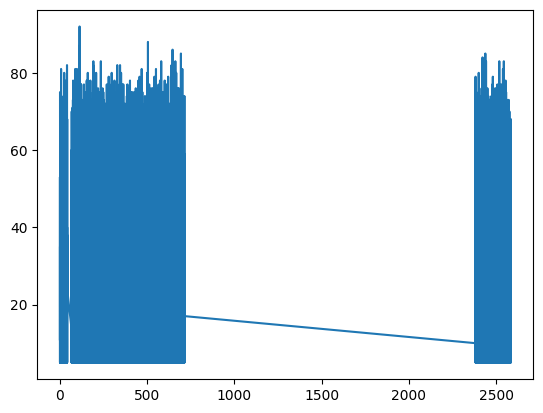

In [24]:
X_train = X_train[:start] + X_train[vals:]
y_train = y_train[:start] + y_train[vals:]

x = [tick[0] + (tick[1]/60.0) - 143038273.0 for tick in X_train]
plt.plot(x, y_train)

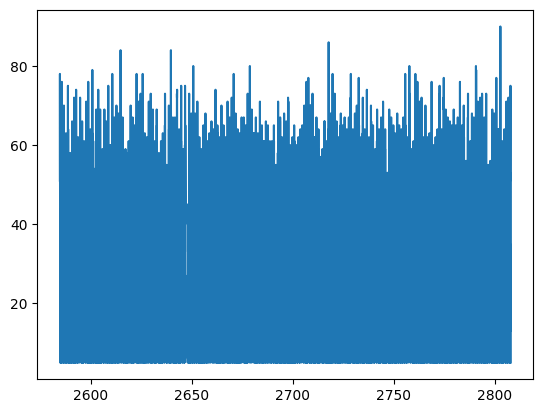

In [25]:
x = [tick[0] + (tick[1]/60.0) - 143038273.0 for tick in X_test]
plt.plot(x, y_test)

In [26]:
x = torch.tensor(X_train)
y = torch.tensor(y_train)

y.shape

torch.Size([53208])

In [27]:
X_train_1d = [tick[0] + (tick[1]/60.0) - 143038273.0 for tick in X_train]

In [28]:
def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.FloatTensor(X), torch.FloatTensor(y)

In [29]:
len(y_train)

53208

In [30]:
training_size = 5000

In [31]:
# changing the output
y_train_ds = [[d] for d in y_train[:training_size]]
y_train_ds

[[11],
 [36],
 [29],
 [26],
 [22],
 [13],
 [15],
 [8],
 [11],
 [31],
 [28],
 [11],
 [33],
 [34],
 [39],
 [53],
 [32],
 [20],
 [46],
 [30],
 [40],
 [25],
 [11],
 [13],
 [17],
 [25],
 [13],
 [12],
 [5],
 [10],
 [5],
 [5],
 [13],
 [6],
 [24],
 [16],
 [9],
 [12],
 [18],
 [35],
 [25],
 [37],
 [36],
 [43],
 [46],
 [45],
 [75],
 [61],
 [47],
 [47],
 [37],
 [51],
 [40],
 [61],
 [43],
 [40],
 [52],
 [31],
 [35],
 [9],
 [5],
 [31],
 [29],
 [15],
 [13],
 [16],
 [16],
 [24],
 [16],
 [22],
 [34],
 [29],
 [21],
 [35],
 [29],
 [41],
 [27],
 [54],
 [42],
 [16],
 [54],
 [38],
 [17],
 [13],
 [17],
 [17],
 [12],
 [5],
 [20],
 [27],
 [5],
 [13],
 [5],
 [8],
 [20],
 [22],
 [5],
 [5],
 [38],
 [24],
 [34],
 [31],
 [26],
 [63],
 [40],
 [39],
 [47],
 [65],
 [62],
 [64],
 [58],
 [37],
 [51],
 [53],
 [45],
 [38],
 [39],
 [23],
 [34],
 [25],
 [19],
 [27],
 [21],
 [34],
 [5],
 [6],
 [20],
 [35],
 [5],
 [5],
 [12],
 [26],
 [12],
 [17],
 [50],
 [37],
 [36],
 [38],
 [45],
 [18],
 [29],
 [25],
 [25],
 [20],
 [10],
 [2

In [32]:
lookback = 1
x, y = create_dataset(y_train_ds, lookback=lookback)
print(x.size(0), y.size(0))

4999 4999


In [33]:
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [34]:
import torch.optim as optim
import torch.utils.data as data
import numpy as np

model = LSTMModel()
optimisation = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(x, y), shuffle=True, batch_size=8)

epochs = 400

In [35]:
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimisation.zero_grad()
        loss.backward()
        optimisation.step()

    print(f"epoch: {epoch}")
    if epoch % 100 != 0:
        continue

    

    # model.eval()
    
    # with torch.no_grad():
    #     y_pred = model(X_train)
    #     train_rmse = np.sqrt(loss_fn(y_pred, y_train))
    #     y_pred = model(X_test)
    #     test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    # print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
epoch: 50
epoch: 51
epoch: 52
epoch: 53
epoch: 54
epoch: 55
epoch: 56
epoch: 57
epoch: 58
epoch: 59
epoch: 60
epoch: 61
epoch: 62
epoch: 63
epoch: 64
epoch: 65
epoch: 66
epoch: 67
epoch: 68
epoch: 69
epoch: 70
epoch: 71
epoch: 72
epoch: 73
epoch: 74
epoch: 75
epoch: 76
epoch: 77
epoch: 78
epoch: 79
epoch: 80
epoch: 81
epoch: 82
epoch: 83
epoch: 84
epoch: 85
epoch: 86
epoch: 87
epoch: 88
epoch: 89
epoch: 90
epoch: 91
epoch: 92
epoch: 93
epoch: 94
epoch: 95
epoch: 96
epoch: 97
epoch: 98
epoch: 99
epoch: 100

In [36]:
print(y_test)

y_test_vals = [[i] for i in y_test]

[51, 78, 54, 59, 36, 48, 42, 36, 19, 32, 25, 10, 5, 20, 10, 20, 5, 12, 8, 16, 18, 5, 29, 19, 17, 35, 35, 35, 40, 31, 44, 35, 35, 28, 26, 16, 13, 13, 28, 16, 5, 5, 15, 19, 5, 12, 9, 5, 17, 5, 7, 29, 20, 32, 36, 37, 55, 76, 42, 50, 47, 56, 51, 55, 36, 54, 39, 43, 38, 30, 10, 28, 13, 10, 28, 27, 5, 12, 8, 22, 8, 13, 20, 8, 29, 41, 32, 23, 38, 46, 35, 19, 45, 20, 23, 9, 18, 23, 19, 16, 5, 5, 5, 15, 5, 5, 17, 5, 11, 22, 16, 16, 24, 43, 35, 43, 49, 58, 60, 26, 70, 58, 60, 57, 59, 55, 38, 35, 30, 26, 16, 27, 21, 5, 21, 11, 21, 19, 10, 23, 23, 13, 21, 34, 20, 6, 22, 29, 58, 40, 46, 43, 25, 35, 26, 23, 20, 19, 8, 5, 22, 10, 5, 6, 7, 9, 26, 6, 19, 57, 13, 26, 20, 41, 19, 43, 59, 51, 52, 42, 46, 63, 45, 49, 50, 51, 36, 19, 25, 16, 18, 21, 23, 13, 18, 12, 13, 5, 26, 11, 5, 11, 16, 11, 36, 48, 42, 32, 62, 41, 14, 38, 27, 33, 28, 28, 10, 14, 19, 12, 7, 5, 7, 5, 5, 7, 14, 13, 33, 11, 7, 40, 28, 39, 33, 35, 68, 31, 59, 75, 59, 50, 40, 22, 54, 45, 64, 31, 39, 9, 38, 10, 17, 24, 5, 6, 32, 23, 11, 8, 18,

torch.Size([13332, 1, 1])


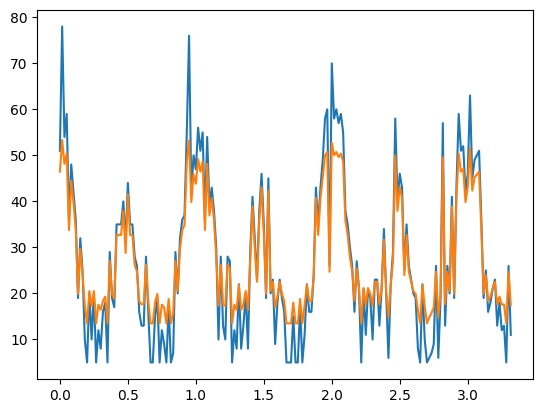

In [37]:
model.eval()



# print(y_test)

x_test, y = create_dataset(y_test_vals, 1)

print(x_test.size())
# print(x_test)

with torch.no_grad():
    
    y_pred = model(x)
    y_test_pred = model(x_test)

y_pred_np = y_pred.detach().numpy().squeeze()
y_test_pred = y_test_pred.detach().numpy().squeeze()

vals = 200

# plt.plot(X_train_1d[:vals], y_train_ds[:vals])
# plt.plot(X_train_1d[:vals], y_pred_np[:vals])
plt.plot(X_train_1d[:vals], y_test[:vals])
plt.plot(X_train_1d[:vals], y_test_pred[:vals])



plt.show()

In [38]:
diff = (y_test[:-1] - y_test_pred) ** 2
mse = np.mean(diff)
mse

29.45666465761544